In [188]:
class Graph:
    def __init__(self, V, E, W=None):
        self.E = [(u, v) for u, v in E]
        self.E.extend([(v,u) for u, v in E])
        self.V = list(set(V))
        self.W = W
        self.adj_list = {}
        self.weights = {}
        self.adjecency = self.adj_matrix()
        self.incidence_matrix = self.incid_matrix()
        for v in V:
            self.add_vertex(v)
        if W == None:
            for u,v in self.E:
                self.adj_list[v].add(u)
                self.adj_list[u].add(v)
                self.weights[(u, v)] = 0 # Set default weight to 0 if not provided
                self.weights[(v, u)] =0
        else:
            for u, v in self.E:
                self.adj_list[v].add(u)
                self.adj_list[u].add(v)
                self.weights[(u, v)] = W.get((u, v), W.get((v,u)))  # Set default weight to 0 if not provided
                self.weights[(v, u)] = W.get((v, u), W.get((u,v))) # Set default weight to 0 if not provided

    # Rest of the code remains the same..
    def degree(self, v):
        return len(self.adj_list[v])

    def neighbours(self, v):
        return self.adj_list[v]

    def add_vertex(self, v):
        if v not in self.adj_list:
            self.adj_list[v] = set()
        if v not in self.V:
            self.V.append(v)

    def add_edge(self, u, v, weight =0):
        self.add_vertex(u)
        self.add_vertex(v)
        self.adj_list[u].add(v)
        self.adj_list[v].add(u)
        self.E.extend([(u, v),(v,u)])
        self.weights[(u, v)] = weight
        self.weights[(v, u)] = weight

    @property
    def nv(self):
        return len(self.adj_list)

    @property
    def nm(self):
        return len(self.E)

    def remove_edge(self, u, v):
        
        self.E.remove((u,v))
        self.E.remove((v,u))
        self.adj_list[u].remove(v)
        self.adj_list[v].remove(u)
        del self.weights[(u, v)]
        del self.weights[(v, u)]


    def remove_vertex(self, v):
        deleting = list(self.adj_list[v])
        for u in deleting:
            self.remove_edge(v, u)
        del self.adj_list[v]
        self.V.remove(v)

    def show_graph_with_edges(self):
        import networkx as nx
        import matplotlib.pyplot as plt
        G = nx.Graph()
        G.add_nodes_from(self.V)
        G.add_edges_from(self.E)

        isolated_nodes = [node for node in G.nodes() if G.degree(node) == 0]

        fig, ax = plt.subplots(figsize=(5, 5))
        pos = nx.spring_layout(G)
        nx.draw_networkx(G, pos=pos, ax=ax, with_labels=True, node_color="red")
        nx.draw_networkx_nodes(G, pos=pos, ax=ax, nodelist=isolated_nodes, node_color="red")
        plt.show()

    def show_graph_with_adj(self):
        import networkx as nx
        import matplotlib.pyplot as plt
        G = nx.Graph()
        G.add_nodes_from(self.adj_list.keys())
        for node, neighbors in self.adj_list.items():
            G.add_edges_from((node, neighbor) for neighbor in neighbors)
        fig, ax = plt.subplots(figsize=(5, 5))
        nx.draw_networkx(G, with_labels=True, node_color="royalblue")
        plt.show()

    def bfs(self, start=None):
        visited = []
        components = []

        if start is not None:
            queue = [start]
            component = []
            while queue:
                current = queue.pop(0)
                if current not in visited:
                    visited.append(current)
                    component.append(current)
                    for n in self.neighbours(current):
                        if n not in visited:
                            queue.append(n)
            components.append(component)
        else:
            for vertex in self.V:
                if vertex not in visited:
                    queue = [vertex]
                    component = []

                    while queue:
                        current = queue.pop(0)
                        if current not in visited:
                            visited.append(current)
                            component.append(current)

                            for n in self.neighbours(current):
                                if n not in visited:
                                    queue.append(n)

                    components.append(component)
        for i in components :
            
            print(" --> ".join([str(j) for j in i]), end = "|")
        return components

    def dfs_recursive(self, start = None, visited=None):
        if visited is None:
            visited = []
        if start is None:
            import random
            start = self.V[random.randint(0,len(self.V)-1)]
        visited.append(start)
        for n in self.neighbours(start):
            if n not in visited:
                self.dfs_recursive(n, visited)
        return visited

    def dfs_stack(self, start = None):
        visited = []
        if start is None:
            import random
            start = self.V[random.randint(0,len(self.V)-1)]
        stack = [start]
        while stack:
            current = stack.pop()
            if current not in visited:
                visited.append(current)
                for n in self.neighbours(current):
                    if n not in visited:
                        stack.append(n)
        print(" --> ".join([str(i) for i in visited]), end = "|")
        return visited
    
    def shortest_path(self, start, end):
        import math
        distances = {v: math.inf for v in self.V}
        distances[start] = 0
        visited = set()
        vertices = [(0, start)]

        while vertices:
            vertices = sorted(vertices, key=lambda x: x[0])
            cur_dist, cur_v = vertices.pop(0)
            if cur_v == end:  # Terminate when reaching the end vertex
                break
            if cur_v in visited:
                continue
            visited.add(cur_v)
            for n in self.neighbours(cur_v):
                weighted_sum = cur_dist + self.weights.get((cur_v, n))
                if weighted_sum < distances[n] or distances[n] is None:
                    distances[n] = weighted_sum
                    vertices.append((weighted_sum, n))

        if distances[end] == math.inf:  # Check if end vertex is unreachable
            return None

        path = [end]
        while path[-1] != start:
            for n in self.neighbours(path[-1]):
                if distances[path[-1]] == distances[n] + self.weights.get((path[-1], n)):
                    path.append(n)
                    break
        path.reverse()
    
        return path, f"cost: {distances[end]}"
    
    def is_connected(self):
        return len(self.bfs()[0]) == len(self.V)

    def mst(self):
        num_vertices = self.nv
        visited = set()
        key = {v: float('inf') for v in self.V}
        parent = {v: None for v in self.V}
        components = []

        while len(visited) != num_vertices:
            # Find an unvisited vertex to start a new component
            start_vertex = next((v for v in self.V if v not in visited), None)
            if start_vertex is None:
                break

            key[start_vertex] = 0
            component = []

            while True:
                # Find the vertex with the minimum key value among unvisited vertices
                min_key = float('inf')
                min_vertex = None

                for v in self.V:
                    if v not in visited and key[v] < min_key:
                        min_key = key[v]
                        min_vertex = v

                if min_vertex is None:
                    break

                visited.add(min_vertex)
                component.append(min_vertex)

                # Update the key values and parent for adjacent vertices
                for neighbor in self.neighbours(min_vertex):
                    if neighbor not in visited and self.weights[(min_vertex, neighbor)] < key[neighbor]:
                        key[neighbor] = self.weights[(min_vertex, neighbor)]
                        parent[neighbor] = min_vertex

            if component:
                components.append(component)

        minimum_spanning_tree = []
        for component in components:
            for v in component:
                if parent[v] is not None:
                    minimum_spanning_tree.append((parent[v], v, key[v]))

        return minimum_spanning_tree, sum([i[2] for i in minimum_spanning_tree])
    

    def assign_numbers(self):
        assigned_numbers = []
        assigned_tuples = []
        string_to_number = {}
        
        # Assign numbers to strings and create string to number mapping
        for i, string in enumerate(self.V):
            assigned_numbers.append(i)
            string_to_number[string] = i
        
        # Convert tuples of strings to tuples of numbers
        for tuple_strings in self.E:
            tuple_numbers = tuple(string_to_number[string] for string in tuple_strings)
            assigned_tuples.append(tuple_numbers)
        g = Graph(assigned_numbers, assigned_tuples)
        return g, string_to_number

    def is_bridge(self, u, v):
        self.remove_edge(u, v)  # Temporarily remove the edge
        is_bridge = not self.is_connected()
        self.add_edge(u, v)  # Add the edge back to the graph
        return is_bridge

    def copy(self):
        g = Graph(self.V, self.E, self.W)
        return g

    def check_eulerian(self):
        def dfs(u, graph, visited_edge, path = []):
            path.append(u)
            for v in graph.adj_list[u]:
                if visited_edge[u][v] == False:
                    visited_edge[u][v], visited_edge[v][u] = True, True
                    path = dfs(v, graph, visited_edge, path)
            return path
        def dfs(u, graph, visited_edge, path = []):
            path.append(u)
            for v in graph.adj_list[u]:
                if visited_edge[u][v] == False:
                    visited_edge[u][v], visited_edge[v][u] = True, True
                    path = dfs(v, graph, visited_edge, path)
            return path
    # for checking if the graph has an Euler path or circuit
        def check_circuit_or_path(graph, max_node):
            odd_degree_nodes = []
            for i in range(max_node):
                if i not in graph.adj_list.keys():
                    continue
                if len(graph.adj_list[graph.V[i]]) % 2 == 1:
                    odd_degree_nodes.append(i)
            if len(odd_degree_nodes) == 0:
                return 1, None
            if len(odd_degree_nodes) == 2:
                return 2, odd_degree_nodes[0]
            return 3, None

        
        max_node = len(self.V)
        assigned_numbers = None
        max_node = len(self.V)
        if isinstance(self.V[0], str):
            self, assigned_numbers = self.assign_numbers()

        visited_edge = [[False for _ in range(max_node + 1)] for _ in range(max_node + 1)]
        check, odd_node = check_circuit_or_path(self, max_node)
        if check == 3:
            print("Graph is not Eulerian")
            print("No path")
            return
        degree = 0
        start_node = None

        if check == 2:
            start_node = odd_node
            print("Graph has an Euler path")
        if check == 1:
            print("Graph has an Euler cycle")
            for v in self.V:
                if self.degree(v) > degree:
                    start_node = v

        path = dfs(start_node, self, visited_edge, list())

        if assigned_numbers:
            reversed_dict = {value: key for key, value in assigned_numbers.items()}
            path = [reversed_dict[node] for node in path]

        print(" --> ".join([str(i) for i in path]))
        return path

    def incid_matrix(self):
        num_vertices = len(self.V)
        num_edges = len(self.E) // 2
        matrix = np.zeros((num_edges, num_vertices), dtype=int)
        if self.V:
            if isinstance(self.V[0], str):
                graph, d = self.assign_numbers()
                vertexes,edges = graph.V, graph.E
            else:
                edges = self.E
                vertexes = self.V
                
            for k, vertex in enumerate(vertexes):
                for i, edge in enumerate(edges):
                    if vertex in edge:
                        if i < num_edges and k < num_vertices:
                            matrix[i, k] = 1

            matrix_df = pd.DataFrame(matrix, columns=self.V, index=self.E[:num_edges])
            matrix_df = matrix_df.astype(int)

            return matrix_df
        else:
            return    
    def adj_matrix(self):
        matrix = np.zeros((len(self.V), len(self.V)))
        for t,i in enumerate(self.V):
            for k,j in enumerate(self.V):
                if (i,j) in self.E:
                    matrix[t,k] = 1
        matrix = pd.DataFrame(matrix, columns= self.V, index= (self.V))
        matrix =matrix.astype(int)
        return matrix
    
    def check_hammiltonian(self):
        for v in self.V:
            n = len(self.V)
            path = [None] * (n + 1)
            visited = set()

            def is_valid(vertex, pos):
                if pos == 0:
                    return True

                if self.adj_list[path[pos - 1]].__contains__(vertex) is False:
                    return False

                if vertex in visited:
                    return False

                return True

            def hamiltonian_cycle_or_path_util(pos, is_cycle):
                if pos == n:
                    if is_cycle:
                        if self.adj_list[path[pos - 1]].__contains__(path[0]):
                            return True
                    elif len(self.adj_list[path[pos - 1]]) != 0:
                        return True

                    return False

                for vertex in self.adj_list[path[pos - 1]]:
                    if is_valid(vertex, pos):
                        path[pos] = vertex
                        visited.add(vertex)

                        if hamiltonian_cycle_or_path_util(pos + 1, is_cycle):
                            return True

                        path[pos] = None
                        visited.remove(vertex)

                return False

            path[0] = v
            visited.add(v)
            if hamiltonian_cycle_or_path_util(1, True):
                path[-1] = path[0]
                print("the graph has Hamiltonian Cycle, therefore hammiltonian")
                print(" --> ".join([str(i) for i in path]))
                return path

            if hamiltonian_cycle_or_path_util(1, False):
                path.remove(None)
                print("the graph has Hamiltonian Path, therefore hammiltonian")
                print(" --> ".join([str(i) for i in path]))
                return path

        print("No Hamiltonian Cycle or Path exists for any vertex in the given graph.")
        return None, None

    def chromatic_number(self):
        def is_valid(vertex, color, coloring):
            for neighbor in graph.neighbours(vertex):
                if neighbor in coloring and coloring[neighbor] == color:
                    return False
            return True

        def backtrack(vertex, coloring):
            if vertex == graph.nv:
                return True

            for color in range(v[1], graph.nv + 1):
                if is_valid(vertex, color, coloring):
                    coloring[vertex] = color
                    if backtrack(vertex + 1, coloring):
                        return True
                    coloring[vertex] = 0

            return False

        coloring = {}
        if isinstance(self.V[0], str):
            graph,d = self.assign_numbers()
            v = graph.V
        else:
            graph = self
            v = graph.V
        if backtrack(v[0], coloring):  # Start with vertex 1
            chromatic_number = max(coloring.values())
            return chromatic_number
        else:
            return None

    def is_bipartie(self):
        if self.chromatic_number() == 2 :
            return True
        else:
            return False
        

    def create_line_graph(self):
        new_e,  key = [],{}
        for nv,e in enumerate(self.E[:len(self.E)//2]):
            for y in self.E[:len(self.E)//2]:
                if set(e).intersection(y) and e != y:
                    new_e.append((e,y))
                    new_e.append((y,e))
            key[e] = nv
        for i in range(len(new_e)):
            m = list(list(new_e[i][0]))
            n = list(list(new_e[i][1]))
            m= key[tuple(m)]
            n= key[tuple(n)]
            new_e[i] = (m,n)
        new_v = key.values()
        LG = Graph(new_v,new_e)
        return LG, key


    def get_complementary_graph(self):
        complementary_graph = Graph([], [])
        for v in self.V:
            for u in self.V:
                if ((u,v) not in self.E or (v,u) not in self.E) and v!= u:
                    complementary_graph.add_edge(v,u)
        return complementary_graph
    
    def chromatic_number_edge(self):
        LG , d= self.create_line_graph()
        return LG.chromatic_number()

In [165]:

l, d = peterson_graph.create_line_graph()

In [166]:
sample_graph6 = Graph(V= (range(6)), E = ([(3,0),(3,4),(0,1),(0,2), (1,2),(0,4), (2,4),(2,5),(4,5)]))

In [167]:
sample_graph7 = Graph(V = [0, 1, 2, 3, 4, 5, 6],E = [(0, 1),(0, 2),(1, 2),(2, 3),(2, 4),(3, 4),(3, 5),(4, 5),(5, 0) ,(3,6),(4,6),(5,6),(0,6)])
sample_graph5 = Graph(set(range(0, 5)), [(0,1), (0,3), (0,4),(0,2), (1,2), (3,4)])

#peterson_graph
vertices = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
edges = [
    (0, 1), (0, 4), (0, 5),
    (1, 2), (1, 6),
    (2, 3), (2, 7),
    (3, 4), (3, 8),
    (4, 9),
    (5, 7), (5, 8),
    (6, 8), (6, 9),
    (7, 9)
]
peterson_graph = Graph(vertices, edges)
edges = [(0,1), (1,2), (2,3),(3,4),(4,5),(5,6), (6,0)]
vertices= list(range(7))
cycle7_graph = Graph(V=vertices, E= edges)

In [168]:
d

{(0, 1): 0,
 (0, 4): 1,
 (0, 5): 2,
 (1, 2): 3,
 (1, 6): 4,
 (2, 3): 5,
 (2, 7): 6,
 (3, 4): 7,
 (3, 8): 8,
 (4, 9): 9,
 (5, 7): 10,
 (5, 8): 11,
 (6, 8): 12,
 (6, 9): 13,
 (7, 9): 14}

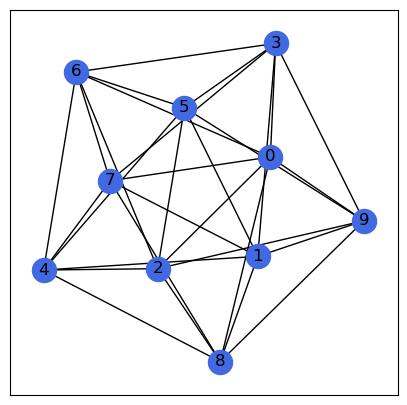

In [169]:

vertices = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
edges = [
    (0, 1), (0, 4), (0, 5),
    (1, 2), (1, 6),
    (2, 3), (2, 7),
    (3, 4), (3, 8),
    (4, 9), 
    (5, 7), (5, 8),
    (6, 8), (6, 9),
    (7, 9)
]
peterson_graph = Graph(vertices, edges)


c = get_complementary_graph(peterson_graph)
c.show_graph_with_adj()

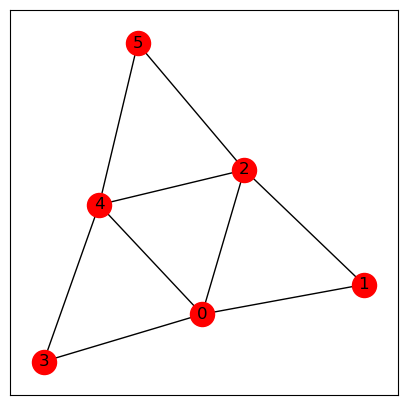

In [170]:
sample_graph6.show_graph_with_edges()

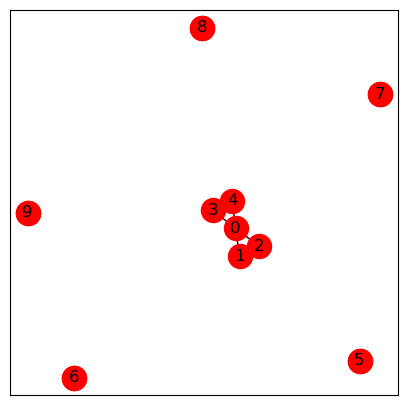

In [171]:
def line_graph_of_graph(graph):
    line_graph = Graph([], [])

    # Create a dictionary to store the vertices of the line graph
    vertex_dict = {}

    # Iterate over each edge in the original graph
    for edge in graph.E[:len(graph.E)//2]:
        u, v = edge

        # Check if the vertices of the edge are already added to the line graph
        if u not in vertex_dict:
            line_graph.add_vertex(u)
            vertex_dict[u] = len(line_graph.E)//2 - 1
        if v not in vertex_dict:
            line_graph.add_vertex(v)
            vertex_dict[v] = len(line_graph.E)//2 - 1

    # Iterate over each pair of edges in the original graph
    for i in range(len(graph.E[:len(graph.V)//2])):
        u1, v1 = graph.E[i]

        # Iterate over the remaining edges
        for j in range(i + 1, len(graph.E[:len(graph.V)//2])):
            u2, v2 = graph.E[j]

            # Check if the edges share a vertex
            if u1 == u2 or u1 == v2 or v1 == u2 or v1 == v2:
                line_graph.add_edge(i, j)

    return line_graph
c= line_graph_of_graph(peterson_graph)
c.show_graph_with_edges()

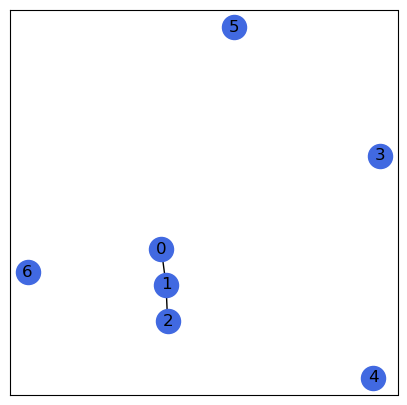

In [172]:
line_graph_of_graph(cycle7_graph).show_graph_with_adj()

In [173]:
weights = {('A', 'B'): 0.2, ('A', 'C'): 2, ('B', 'C'): 3, ('B', 'D'): 1, ('C', 'D'): 5, ('C', 'E'): 6, ('D', 'E'): 3}
vertices = ['A', 'B', 'C', 'D', 'E']
edges = [('A', 'B'), ('A', 'C'), ('B', 'C'), ('B', 'D'), ('C', 'D'), ('C', 'E'), ('D', 'E')]
sample_graph = Graph(vertices, edges, weights)


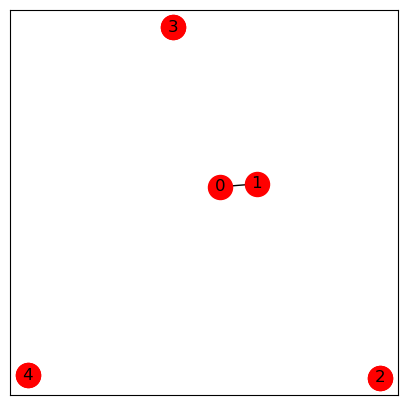

In [174]:
line_graph_of_graph(sample_graph.assign_numbers()[0]).show_graph_with_edges()

In [177]:
peterson_graph.chromatic_number_edge()


4

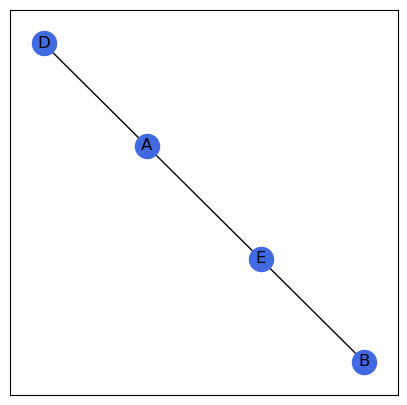

In [187]:


get_complementary_graph(sample_graph).show_graph_with_adj()


In [147]:
line_graph(cycle7_graph)[0].chromatic_number()

3

In [2]:
import graph_plotter
print(graph_plotter.__file__)

c:\ProgramData\anaconda3\lib\graph_plotter.py


In [1]:
from my_graph import Graph